#### 목적에 맞춰서 데이터를 준비하고 다듬는 방법을 알아보자

In [3]:
import pandas as pd
import os

#### 1. 데이터 병합
- contact
- 4, 5, 6월 pay-info 데이터를 각각 불러와서 한개의 df로 병합

In [8]:
print(os.getcwd())

/Users/kimhyerim/workspace/SWDataAnalysisClass/pythonStudy/LIB


In [10]:
# 작업 디렉토리 변경
os.chdir('data')

In [12]:
print(os.getcwd())

/Users/kimhyerim/workspace/SWDataAnalysisClass/pythonStudy/LIB/data


In [16]:
os.listdir(os.getcwd())

['mpg.csv',
 '월별지급',
 '.DS_Store',
 'score.csv',
 'Traffic_Accident_2017.csv',
 'ratings.dat',
 '2015.csv',
 'temp.txt',
 '2016.csv',
 '2017.csv',
 'hr-info.csv',
 '.ipynb_checkpoints']

In [19]:
os.listdir('월별지급')

['hr-pay-info-5월.csv',
 '.DS_Store',
 'hr-pay-info-4월.csv',
 'hr-pay-info-6월.csv']

In [23]:
file_names = os.listdir('월별지급')
file_names

['hr-pay-info-5월.csv',
 '.DS_Store',
 'hr-pay-info-4월.csv',
 'hr-pay-info-6월.csv']

In [27]:
file_names[0]

'hr-pay-info-5월.csv'

In [29]:
file_names[1]

'.DS_Store'

In [31]:
file_names[2]

'hr-pay-info-4월.csv'

In [33]:
'월별지급/' + file_names[0]

'월별지급/hr-pay-info-5월.csv'

In [35]:
pay_df_list = []
for fn in file_names:
    if fn != '.DS_Store':
        df = pd.read_csv('월별지급/' + fn, encoding = 'euc-kr') # 파일을 불러와서 df에 넣어줌
        pay_df_list.append(df) # df를 리스트에 추가

In [37]:
pay_df_list

[        EID  PAYMENT_DY PAYMENT_DVCD  PAYMENT_AMOUNT
 0    E00206    20240501           월급             850
 1    E00181    20240501           월급             791
 2    E00164    20240501           월급             758
 3    E00190    20240501           월급             708
 4    E00209    20240501           월급             716
 ..      ...         ...          ...             ...
 146  E00322    20240501           월급             375
 147  E00389    20240501           월급             375
 148  E00438    20240501           월급             375
 149  E00304    20240501           월급             375
 150  E00428    20240501           월급             375
 
 [151 rows x 4 columns],
         EID  PAYMENT_DY PAYMENT_DVCD  PAYMENT_AMOUNT
 0    E00206    20240401           월급             850
 1    E00181    20240401           월급             791
 2    E00164    20240401           월급             758
 3    E00190    20240401           월급             708
 4    E00209    20240401           월급             716
 

In [39]:
# 데이터 병합
total_df = pd.concat(pay_df_list)

In [41]:
total_df

,EID,PAYMENT_DY,PAYMENT_DVCD,PAYMENT_AMOUNT
0,E00206,20240501,월급,850
1,E00181,20240501,월급,791
2,E00164,20240501,월급,758
3,E00190,20240501,월급,708
4,E00209,20240501,월급,716
...,...,...,...,...
146,E00322,20240601,월급,375
147,E00389,20240601,월급,375
148,E00438,20240601,월급,375
149,E00304,20240601,월급,375


In [43]:
# csv 파일로 저장
total_df.to_csv('total_pay_info.csv')

#### org_info 데이터(조직정보)에 각 조직별 조직 인원수, 평균나이, 평균근무년수, 평균연봉 확인

In [58]:
# 조직 정보 데이터 확인
org_info = pd.read_csv('org-info.csv', encoding = 'euc-kr', index_col = 'ORG_CD') # 부서별 코드를 인덱스 번호로 지정
org_info.head(1)

,ENG_DIVISION,KOR_DIVISION,ENG_DEPARTMENT,KOR_DEPARTMENT,Team,KOR_TEAM,Role
ORG_CD,,,,,,,
ORG001,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Product Management Team,TV 제품 관리 팀,관리 및 마케팅 전략 수립을 통해 TV 제품의 전체 라이프사이클을 관리합니다.


In [56]:
# 인사정보 데이터 확인
hr_info = pd.read_csv('hr-info.csv', encoding = 'euc-kr') # 부서별 코드를 인덱스 번호로 지정
hr_info.head(1)

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.5,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y


In [62]:
# 조직별 인원수
hr_info.groupby('ORG_CD').count().head(1)

# 조직 정보 데이터와 공통적으로 갖고 있는 컬럼 => ORG_CD
# ORG_CD 컬럼을 기준으로 groupby 진행

,EID,ENAME,GENDER,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
ORG_CD,,,,,,,,,,,,,,,,,,,
ORG001,6,6,6,6,6,6,6,6,6,5,6,6,6,6,1,1,1,6,6


In [79]:
# hr_info에서 groupby를 이용해서 조직 인원수, 평균 나이, 평균 근무 년수, 평균 연봉 계산한 df 만들기
org_agg = hr_info.groupby('ORG_CD').agg({
    'ENAME' : 'count',
    'AGE' : 'mean',
    'SERVICE_YEAR' : 'mean',
    'SALARY' : 'mean'
}).round(2)
org_agg

,ENAME,AGE,SERVICE_YEAR,SALARY
ORG_CD,,,,
ORG001,6,26.17,0.33,5033.33
ORG002,4,34.00,7.50,6550.00
ORG003,5,34.60,7.60,6480.00
ORG004,11,35.18,7.00,6445.45
ORG005,8,29.25,2.00,5525.00
ORG006,6,30.83,4.17,5966.67
ORG007,7,36.71,8.00,6728.57
ORG008,5,32.40,5.20,6020.00
ORG009,5,29.80,2.20,5520.00


In [81]:
# org-info 와 조직 구성원 데이터에서 추출한 df를 열 방향으로 병합
# 주의할 점: concat을 이용한 열방향 병합시, 각 DataFrame의 인덱스를 같게해야 올바른 병합이 일어남

org_info_new = pd.concat([org_info, org_agg], axis = 1)
org_info_new

,ENG_DIVISION,KOR_DIVISION,ENG_DEPARTMENT,KOR_DEPARTMENT,Team,KOR_TEAM,Role,ENAME,AGE,SERVICE_YEAR,SALARY
ORG_CD,,,,,,,,,,,
ORG001,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Product Management Team,TV 제품 관리 팀,관리 및 마케팅 전략 수립을 통해 TV 제품의 전체 라이프사이클을 관리합니다.,6,26.17,0.33,5033.33
ORG002,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Marketing Team,TV 마케팅 팀,"TV 제품의 시장 진입 전략을 수립하고, 광고 및 프로모션 활동을 기획합니다.",4,34.00,7.50,6550.00
ORG003,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Customer Support Team,TV 고객 지원 팀,TV 고객 지원 서비스 제공 및 고객 만족도를 높이기 위한 해결책을 제공합니다.,5,34.60,7.60,6480.00
ORG004,Home Entertainment Division,HE사업본부,webOS Software Development Department,webOS SW개발그룹,webOS Core Development Team,webOS 핵심 개발 팀,webOS 플랫폼의 핵심 기능 개발 및 유지보수를 담당합니다.,11,35.18,7.00,6445.45
ORG005,Home Entertainment Division,HE사업본부,webOS Software Development Department,webOS SW개발그룹,webOS User Interface Team,webOS 사용자 인터페이스 팀,webOS의 사용자 인터페이스 디자인 및 개선을 담당합니다.,8,29.25,2.00,5525.00
ORG006,Home Entertainment Division,HE사업본부,webOS Software Development Department,webOS SW개발그룹,webOS Quality Assurance Team,webOS 품질 보증 팀,webOS 소프트웨어의 품질 검증 및 테스트를 수행합니다.,6,30.83,4.17,5966.67
ORG007,Vehicle Solutions Division,VS사업본부,Global Customer Strategy Department,글로벌고객전략담당,Global Sales Strategy Team,글로벌 판매 전략 팀,"글로벌 판매 전략을 수립하고, 주요 시장에서의 판매 목표를 설정합니다.",7,36.71,8.00,6728.57
ORG008,Vehicle Solutions Division,VS사업본부,Global Customer Strategy Department,글로벌고객전략담당,Key Account Management Team,주요 고객 관리 팀,"주요 고객과의 관계를 관리하고, 맞춤형 솔루션을 제공합니다.",5,32.40,5.20,6020.00
ORG009,Vehicle Solutions Division,VS사업본부,Global Customer Strategy Department,글로벌고객전략담당,Customer Insights Team,고객 통찰 팀,"고객 데이터를 분석하여 인사이트를 도출하고, 이를 기반으로 제품 및 서비스 개선안을...",5,29.80,2.20,5520.00


merge
- 공통된 컬럼을 기준으로 양쪽의 데이터를 병합할 때 사용
- 데이터 베이스의 조인 개념과 매우 유샤(inner, outter, left, right)
- 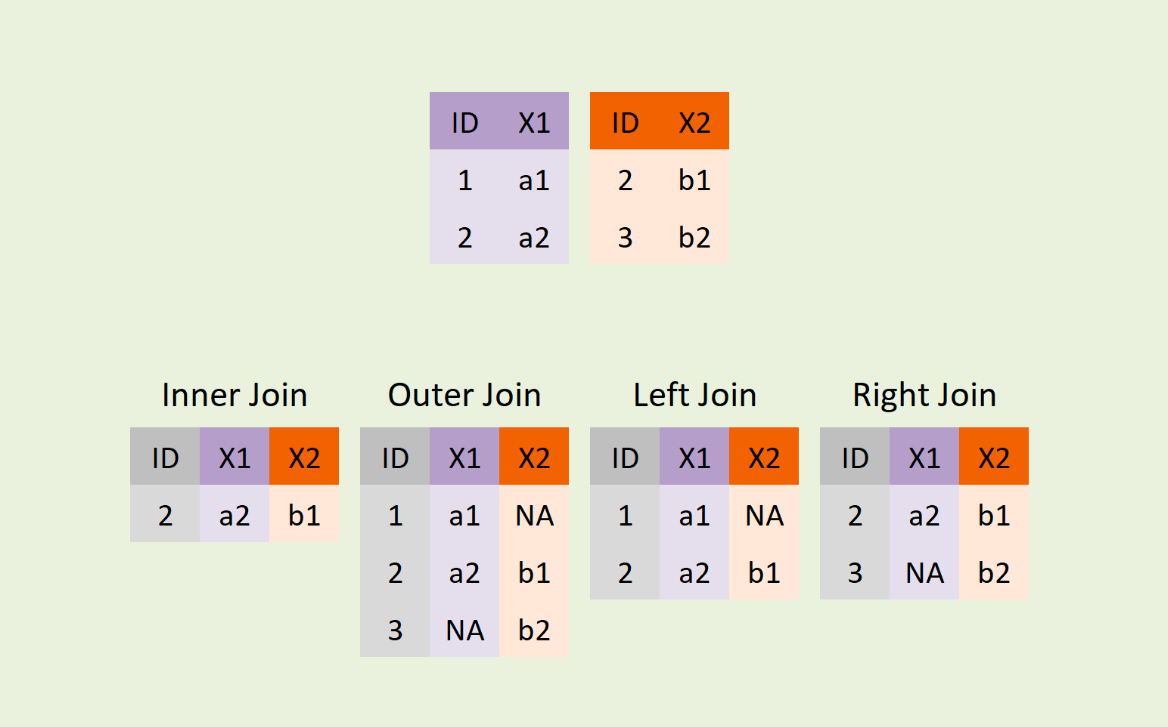

In [87]:
# 급여 지급 내역 데이터 로딩
hr_pay_info = pd.read_csv('hr-pay-info.csv', encoding = 'euc-kr')
hr_pay_info

,EID,PAYMENT_DY,PAYMENT_DVCD,PAYMENT_AMOUNT
0,E00206,20240601,월급,850
1,E00181,20240601,월급,791
2,E00164,20240601,월급,758
3,E00190,20240601,월급,708
4,E00209,20240601,월급,716
...,...,...,...,...
750,E00322,20240401,상여금,300
751,E00389,20240401,상여금,300
752,E00438,20240401,상여금,300
753,E00304,20240401,상여금,300


In [89]:
# 데이터 수 확인
print(hr_info.shape)
print(hr_pay_info.shape)

(200, 20)
(755, 4)


In [93]:
set(hr_info.columns) - (set(hr_info.columns) - set(hr_pay_info.columns))

{'EID'}

In [97]:
# 둘 다 가지고 있는 EID 컬럼을 중심으로 merge
# 사원 정보데이터에서, 사용할 EID, 이름, 성별만 추출
hr_info_df = hr_info[['EID', 'ENAME', 'GENDER']]

In [101]:
# 사원 정보데이터 기준으로 merge
total_salary_df1 = pd.merge(hr_info_df, hr_pay_info, how = 'left', on = 'EID')
total_salary_df1
# 병합시, 'EID' 열을 기준으로 병합, 왼쪽 데이터 기준으로 병합

,EID,ENAME,GENDER,PAYMENT_DY,PAYMENT_DVCD,PAYMENT_AMOUNT
0,E00206,시이오,M,20240601.0,월급,850.0
1,E00206,시이오,M,20240501.0,월급,850.0
2,E00206,시이오,M,20240401.0,월급,850.0
3,E00206,시이오,M,20240401.0,성과급,425.0
4,E00206,시이오,M,20240401.0,상여금,300.0
...,...,...,...,...,...,...
799,E00428,을충나,F,20240601.0,월급,375.0
800,E00428,을충나,F,20240501.0,월급,375.0
801,E00428,을충나,F,20240401.0,월급,375.0
802,E00428,을충나,F,20240401.0,성과급,188.0


In [103]:
# 급여 지급 내역 기준으로 merge
total_salary_df2 = pd.merge(hr_info_df, hr_pay_info, how = 'right', on = 'EID')
total_salary_df2

,EID,ENAME,GENDER,PAYMENT_DY,PAYMENT_DVCD,PAYMENT_AMOUNT
0,E00206,시이오,M,20240601,월급,850
1,E00181,나사장,F,20240601,월급,791
2,E00164,난부사장,M,20240601,월급,758
3,E00190,판라다,F,20240601,월급,708
4,E00209,누훈봉,M,20240601,월급,716
...,...,...,...,...,...,...
750,E00322,부탐회,F,20240401,상여금,300
751,E00389,초두반,F,20240401,상여금,300
752,E00438,권개득,M,20240401,상여금,300
753,E00304,탐출조,M,20240401,상여금,300


In [ ]:
# 급여지급 내역을 중심으로 merge 했을 때 더 적음
# -> 급여지급이 안된 인원들이 있다는 의미

In [119]:
# 지급 내역이 없는 인원들을 확인
total_salary_df1['PAYMENT_DY'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
799    False
800    False
801    False
802    False
803    False
Name: PAYMENT_DY, Length: 804, dtype: bool

In [117]:
# 불리언 인덱싱
no_money = total_salary_df1[total_salary_df1['PAYMENT_DY'].isnull()]
no_money

,EID,ENAME,GENDER,PAYMENT_DY,PAYMENT_DVCD,PAYMENT_AMOUNT
80,E00207,초디소,M,NaN,NaN,NaN
86,E00239,헌란처,M,NaN,NaN,NaN
102,E00323,묵단언,F,NaN,NaN,NaN
108,E00394,우전회,F,NaN,NaN,NaN
119,E00174,탐선반,M,NaN,NaN,NaN
150,E00274,민남무,M,NaN,NaN,NaN
181,E00334,무공담,M,NaN,NaN,NaN
182,E00445,속묵우,M,NaN,NaN,NaN
203,E00283,도온강,F,NaN,NaN,NaN
204,E00312,장춘란,F,NaN,NaN,NaN


In [125]:
# 지급 내역이 없는 사람들이 현재 퇴사를 했는지 알아보자
pd.merge(no_money, hr_info)[['ENAME', 'RETIRE_DATE']]
# 최사자여서 급여지급이 없었음

,ENAME,RETIRE_DATE
0,초디소,2022-02-28
1,헌란처,2023-02-28
2,묵단언,2023-02-28
3,우전회,2024-02-29
4,탐선반,2024-02-29
5,민남무,2024-02-29
6,무공담,2024-02-29
7,속묵우,2024-02-29
8,도온강,2024-02-29
9,장춘란,2024-02-29


#### 2. 정렬
- sort
  - 인덱스를 기준으로 정렬하기: df.sort_index()
  - 값을 기준으로 정렬하기: df.sort_values()

In [138]:
# 인덱스 지정 후, 인덱스 기준 오름차순 정렬
hr_info.set_index('EID').sort_index()

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
EID,,,,,,,,,,,,,,,,,,,
E00163,득치패,M,ORG013,P008,28,0,학사 학위,0.00,5000,2024-03-01,4,"Project Management, Salesforce, Java",Y,2024-03-01,NaN,NaN,NaN,KOREA,N
E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
E00165,내감반,M,ORG006,P008,24,0,학사 학위,0.00,5000,2024-03-01,4,"Python, Data Analysis",Y,2024-03-01,NaN,NaN,NaN,KOREA,Y
E00167,명묵말,M,ORG013,P005,42,12,석사 학위,3.88,7300,2024-03-01,46,Salesforce,Y,2012-03-01,NaN,NaN,NaN,KOREA,Y
E00168,인환숙,M,ORG025,P007,30,1,학사 학위,4.18,5600,2024-03-01,60,Data Analysis,N,2023-03-01,2024-03-01,이직,N,KOREA,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E00494,탄배매,F,ORG030,P007,30,1,학사 학위,3.67,5600,2024-03-01,49,"Salesforce, Java, Marketing",N,2023-03-01,2024-03-01,건강 문제,N,India,Y
E00495,충창동,F,ORG017,P007,30,1,학사 학위,1.92,5600,2024-03-01,59,"Marketing, Project Management, Data Analysis",N,2023-03-01,2024-03-01,이직,N,UK,Y
E00496,우봉망,F,ORG002,P006,35,7,학사 학위,1.20,6700,2024-03-01,62,"Project Management, Marketing",Y,2017-03-01,NaN,NaN,NaN,USA,Y


In [146]:
# 컬럼 정렬
hr_info.sort_index(axis = 1)
# 알파벳 순

,ACTIVE_STATE,AGE,EDU_LEVEL,EID,ENAME,GENDER,HIRE_DATE,LAST_PROMO_DT,NATION,ORG_CD,PERFORMANCE_SCORE,POS_CD,REHIRE_YN,RETIRE_DATE,RETIRE_REASON,ROUNDING_DEDUCTION,SALARY,SERVICE_YEAR,SKILLS,TRAINING_HOURS
0,Y,49,박사 학위,E00206,시이오,M,1999-03-01,2024-03-01,KOREA,NaN,4.50,P001,NaN,NaN,NaN,Y,10200,25,"Marketing, Salesforce",240
1,Y,49,박사 학위,E00181,나사장,F,2000-03-01,2024-03-01,KOREA,NaN,4.60,P002,NaN,NaN,NaN,Y,9500,24,"Project Management, Marketing",236
2,Y,48,박사 학위,E00164,난부사장,M,2002-03-01,2024-03-01,KOREA,NaN,4.60,P003,NaN,NaN,NaN,Y,9100,22,"Salesforce, Data Analysis, Java",240
3,Y,47,박사 학위,E00190,판라다,F,2006-03-01,2024-03-01,KOREA,ORG007,3.51,P004,NaN,NaN,NaN,Y,8500,18,"Java, Data Analysis, Salesforce",96
4,Y,47,박사 학위,E00209,누훈봉,M,2005-03-01,2023-03-01,KOREA,ORG023,3.38,P004,NaN,NaN,NaN,Y,8600,19,"Java, Salesforce",66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Y,23,학사 학위,E00322,부탐회,F,2024-09-01,NaN,KOREA,ORG014,0.00,P009,NaN,NaN,NaN,N,4500,0,Java,4
196,Y,23,학사 학위,E00389,초두반,F,2024-09-01,NaN,KOREA,ORG012,0.00,P009,NaN,NaN,NaN,N,4500,0,"Salesforce, Java",4
197,Y,23,학사 학위,E00438,권개득,M,2024-09-01,NaN,KOREA,ORG024,0.00,P009,NaN,NaN,NaN,N,4500,0,Python,4
198,Y,24,학사 학위,E00304,탐출조,M,2024-09-01,NaN,KOREA,ORG009,0.00,P009,NaN,NaN,NaN,N,4500,0,Salesforce,4


In [150]:
# 값을 기준으로 정렬
hr_info.sort_values(by = 'SALARY', ascending = False)

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
7,E00487,고명초,F,ORG014,P004,47,20,석사 학위,1.81,8600,2022-03-01,49,"Marketing, Salesforce, Project Management",Y,2004-03-01,NaN,NaN,NaN,Japan,Y
10,E00294,중우방,F,ORG021,P004,48,19,박사 학위,2.56,8600,2023-03-01,12,"Python, Salesforce, Java",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,E00300,랑화구,F,ORG001,P009,22,0,학사 학위,0.00,4500,NaN,4,Marketing,Y,2024-03-01,NaN,NaN,NaN,KOREA,N
184,E00275,복판백,M,ORG017,P009,22,0,학사 학위,0.00,4500,NaN,4,"Marketing, Salesforce",N,2024-03-01,2024-02-28,계약만료,N,KOREA,N
183,E00192,감옥신,F,ORG017,P009,22,0,학사 학위,0.00,4500,NaN,4,"Project Management, Python, Salesforce",N,2024-03-01,2024-02-28,계약만료,N,KOREA,N
182,E00183,용조담,F,ORG023,P009,22,0,학사 학위,0.00,4500,NaN,4,"Python, Java, Salesforce",Y,2024-03-01,NaN,NaN,NaN,KOREA,N


In [154]:
# 두가지 기준으로 정렬 -> 나이, 연봉
hr_info.sort_values(['AGE', 'SALARY'])
# 1. 나이순으로 오름차순
# 2. 나이가 같은 경우, 그 안에서 연봉으로 오름차순

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
182,E00183,용조담,F,ORG023,P009,22,0,학사 학위,0.00,4500,NaN,4,"Python, Java, Salesforce",Y,2024-03-01,NaN,NaN,NaN,KOREA,N
183,E00192,감옥신,F,ORG017,P009,22,0,학사 학위,0.00,4500,NaN,4,"Project Management, Python, Salesforce",N,2024-03-01,2024-02-28,계약만료,N,KOREA,N
184,E00275,복판백,M,ORG017,P009,22,0,학사 학위,0.00,4500,NaN,4,"Marketing, Salesforce",N,2024-03-01,2024-02-28,계약만료,N,KOREA,N
185,E00281,빈태봉,F,ORG021,P009,22,0,고등학교 졸업,0.00,4500,NaN,4,Java,N,2024-03-01,2024-02-28,계약만료,N,KOREA,N
186,E00300,랑화구,F,ORG001,P009,22,0,학사 학위,0.00,4500,NaN,4,Marketing,Y,2024-03-01,NaN,NaN,NaN,KOREA,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,E00411,구류길,M,ORG004,P004,48,18,박사 학위,4.87,8500,2024-03-01,37,"Data Analysis, Java, Python",Y,2006-03-01,NaN,NaN,NaN,USA,Y
10,E00294,중우방,F,ORG021,P004,48,19,박사 학위,2.56,8600,2023-03-01,12,"Python, Salesforce, Java",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y


In [162]:
hr_info.sort_values('AGE', ascending = False, inplace = True)

#### rank

In [169]:
# 랭킹을 매겨주는 함수
# 숫자가 낮은 값이 rank 1

org_info_new['SALARY'].rank()

ORG_CD
ORG001     2.0
ORG002    28.0
ORG003    26.0
ORG004    25.0
ORG005     8.0
ORG006    15.0
ORG007    30.0
ORG008    16.0
ORG009     6.5
ORG010    23.0
ORG011    29.0
ORG012    11.0
ORG013    14.0
ORG014    17.5
ORG015     1.0
ORG016    27.0
ORG017     6.5
ORG018    12.0
ORG019     5.0
ORG020     3.0
ORG021    24.0
ORG022    17.5
ORG023    10.0
ORG024    13.0
ORG025    20.0
ORG026     4.0
ORG027    21.0
ORG028    19.0
ORG029    22.0
ORG030     9.0
Name: SALARY, dtype: float64

In [179]:
# 높은 값이 rank 1 이 나오게 : ascending 옵션 사용
# 랭킹 값이 들어갈 새로운 열을 추가
org_info_new['SALARY_RANK'] = org_info_new['SALARY'].rank(ascending = False)
org_info_new.sort_values('SALARY_RANK').head()

,ENG_DIVISION,KOR_DIVISION,ENG_DEPARTMENT,KOR_DEPARTMENT,Team,KOR_TEAM,Role,ENAME,AGE,SERVICE_YEAR,SALARY,SALARY_RANK
ORG_CD,,,,,,,,,,,,
ORG007,Vehicle Solutions Division,VS사업본부,Global Customer Strategy Department,글로벌고객전략담당,Global Sales Strategy Team,글로벌 판매 전략 팀,"글로벌 판매 전략을 수립하고, 주요 시장에서의 판매 목표를 설정합니다.",7,36.71,8.00,6728.57,1.0
ORG011,Vehicle Solutions Division,VS사업본부,VS Asia Sales/PM Department,VS아시아영업/PM담당,Project Management Team,프로젝트 관리 팀,"프로젝트 계획 수립 및 실행, 리소스 관리 및 일정 관리를 담당합니다.",5,37.40,8.40,6660.00,2.0
ORG002,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Marketing Team,TV 마케팅 팀,"TV 제품의 시장 진입 전략을 수립하고, 광고 및 프로모션 활동을 기획합니다.",4,34.00,7.50,6550.00,3.0
ORG016,Business Solutions Division,BS사업본부,B2B India Business Department,B2B인도사업담당,India B2B Sales Team,인도 B2B 판매 팀,"인도 지역 B2B 판매 활동을 관리하고, 고객 맞춤형 솔루션을 제공합니다.",8,35.00,7.25,6500.00,4.0
ORG003,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Customer Support Team,TV 고객 지원 팀,TV 고객 지원 서비스 제공 및 고객 만족도를 높이기 위한 해결책을 제공합니다.,5,34.60,7.60,6480.00,5.0
